### LSTM ARCHITECTURE

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv('mental_health.csv')
Data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [3]:
Data.tail()

,text,label
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1
27976,got nudes person might might know snapchat do ...,0


In [4]:
Data['label'].value_counts()

label
0    14139
1    13838
Name: count, dtype: int64

In [5]:
Data['text'] = Data['text'].apply(lambda x: x.lower() if pd.notna(x) else "")

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data['label'] = label_encoder.fit_transform(Data['label'])

In [7]:
num_classes = len(label_encoder.classes_) 

In [8]:
x = Data['text']
y = Data['label']

In [9]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=num_classes)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
max_words = 10000  
max_sequence_length = 100

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

In [13]:
X_train_sequences = tokenizer.texts_to_sequences(x_train)
X_test_sequences = tokenizer.texts_to_sequences(x_test)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [15]:
embedding_dim = 100  
lstm_units = 128

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(units=num_classes, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
epochs = 20
batch_size = 32

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('MENTAL.h5', 
                                   monitor='accuracy', 
                                   save_best_only=True, 
                                   verbose=1,
                                   mode='max')

In [21]:
model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[model_checkpoint])

Epoch 1/20


630/630 [==============================] - ETA: 0s - loss: 0.2651 - accuracy: 0.8923
Epoch 1: accuracy improved from -inf to 0.89226, saving model to MENTAL.h5
630/630 [==============================] - 306s 465ms/step - loss: 0.2651 - accuracy: 0.8923 - val_loss: 0.2603 - val_accuracy: 0.9049
Epoch 2/20


F:\SOFTWARE\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


630/630 [==============================] - ETA: 0s - loss: 0.1661 - accuracy: 0.9391
Epoch 2: accuracy improved from 0.89226 to 0.93908, saving model to MENTAL.h5
630/630 [==============================] - 346s 549ms/step - loss: 0.1661 - accuracy: 0.9391 - val_loss: 0.2434 - val_accuracy: 0.9080
Epoch 3/20
630/630 [==============================] - ETA: 0s - loss: 0.1220 - accuracy: 0.9574
Epoch 3: accuracy improved from 0.93908 to 0.95740, saving model to MENTAL.h5
630/630 [==============================] - 310s 493ms/step - loss: 0.1220 - accuracy: 0.9574 - val_loss: 0.2565 - val_accuracy: 0.9071
Epoch 4/20
630/630 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 0.9662
Epoch 4: accuracy improved from 0.95740 to 0.96619, saving model to MENTAL.h5
630/630 [==============================] - 267s 424ms/step - loss: 0.0965 - accuracy: 0.9662 - val_loss: 0.2679 - val_accuracy: 0.9102
Epoch 5/20
630/630 [==============================] - ETA: 0s - loss: 0.0799 - accur

In [22]:
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

175/175 [==============================] - 10s 52ms/step


In [23]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_true_classes,y_pred_classes)

print("THE ACCURACY SCORE OF LSTM ARCHITECTURE IS :",AC*100)

THE ACCURACY SCORE OF LSTM ARCHITECTURE IS : 89.43888491779842


In [24]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_true_classes,y_pred_classes)

print("THE HAMMING LOSS OF LSTM ARCHITECTURE IS :",HL*100)

THE HAMMING LOSS OF LSTM ARCHITECTURE IS : 10.561115082201573


In [25]:
from sklearn.metrics import classification_report

CM = classification_report(y_true_classes,y_pred_classes)

print('THE CLASSIFICATION REPORT OF LSTM ARCHITECTURE:\n\n\n',CM)

THE CLASSIFICATION REPORT OF LSTM ARCHITECTURE:


               precision    recall  f1-score   support

           0       0.90      0.89      0.89      2802
           1       0.89      0.90      0.89      2794

    accuracy                           0.89      5596
   macro avg       0.89      0.89      0.89      5596
weighted avg       0.89      0.89      0.89      5596



In [26]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_true_classes,y_pred_classes)

print('THE CONFUSION MATRIX SCORE OF LSTM ARCHITECTURE:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF LSTM ARCHITECTURE:


 [[2487  315]
 [ 276 2518]]


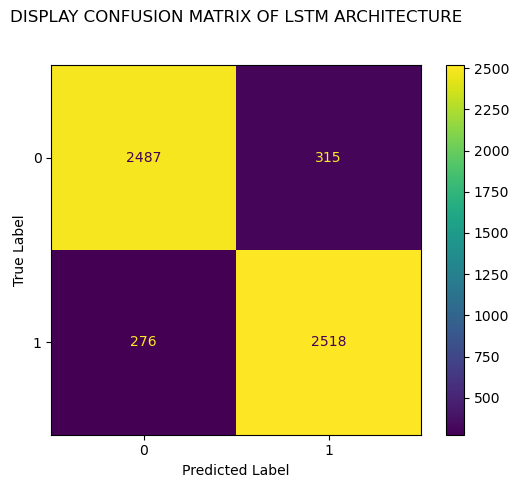

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the y_pred_classes and y_true_classes arrays with predicted and true labels respectively.

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix using ConfusionMatrixDisplay
classes = np.arange(cm.shape[0])  # Assuming your classes are integers from 0 to n_classes-1
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')

plt.title('DISPLAY CONFUSION MATRIX OF LSTM ARCHITECTURE\n\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


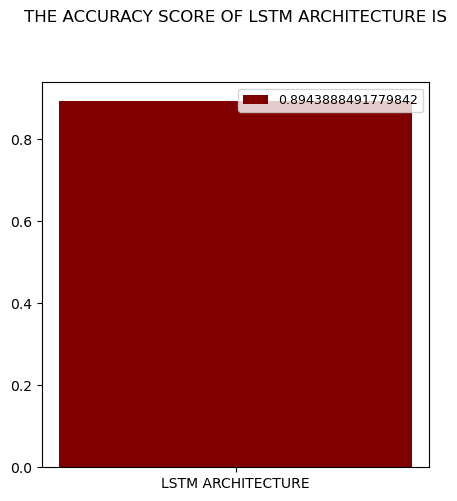

In [28]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="LSTM ARCHITECTURE"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("MAROON"))
    plt.title("THE ACCURACY SCORE OF LSTM ARCHITECTURE IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()